<a href="https://colab.research.google.com/github/oyeabhijit/stockprediction/blob/main/TSLA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-22,164.434006,166.356003,162.399994,163.376007,163.376007,49937500
1,2020-05-26,166.899994,166.919998,163.141998,163.774002,163.774002,40448500
2,2020-05-27,164.171997,165.542007,157.000000,164.046005,164.046005,57747500
3,2020-05-28,162.701996,164.949997,160.337997,161.162003,161.162003,36278000
4,2020-05-29,161.750000,167.000000,160.841995,167.000000,167.000000,58822500


# Visualization of the "Close" column.

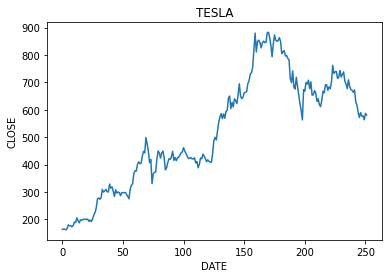

In [9]:
close=data['Close']
ax=close.plot(title="TESLA")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [10]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [14]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [21]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-17,71.791848,-484.996381,669.008122
613,2022-05-18,68.948959,-493.115923,690.220568
614,2022-05-19,66.523891,-495.568822,681.483623
615,2022-05-20,65.378103,-503.881501,684.310864
616,2022-05-21,62.126975,-524.230690,687.275410


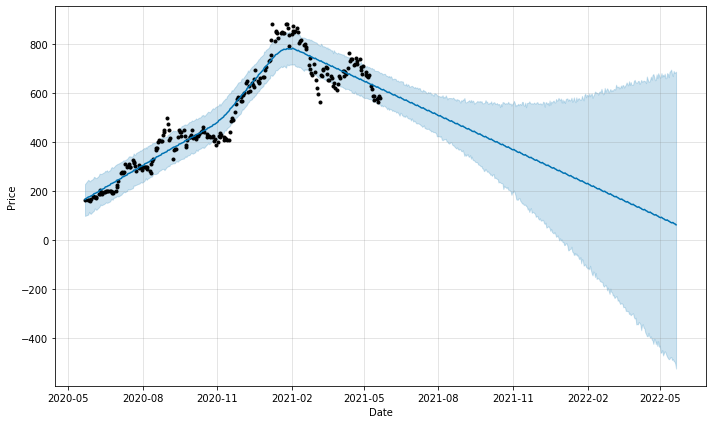

In [22]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")